# <center> 👉 class_13_2 » _Pose Estimation(Ⅱ)_ </center>   

# Pose Estimation w/ Mediapipe 
https://www.analyticsvidhya.com/blog/2021/05/pose-estimation-using-opencv/  
https://chuoling.github.io/mediapipe/  
https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/
https://puleugo.tistory.com/17    

# ▣ Mediapipe (Google) 
https://chuoling.github.io/mediapipe/

There are a variety of pose estimations software available, such as OpenPose , MediaPipe, PoseNet, etc.  
- While OpenPose and PoseNet are able to support real-time multi-person pose estimations,   
- __Mediapipe is only able to support single person pose estimation.__  


Mediapipe is a framework mainly used for building multimodal audio, video, or any time series data.   
- Cutting edge ML models using Mediapipe  
>- Face Detection
>- Multi-hand Tracking
>- Hair Segmentation
>- Object Detection and Tracking
>- Objectron: 3D Object Detection and Tracking
>- AutoFlip: Automatic video cropping pipeline  

Media Pipe Pose is a framework for high-fidelity body pose tracking, which takes input from RGB video frames and infers 33 3D landmarks on the whole human.   
- Current state-of-the-art approach methods rely primarily on powerful desktop environments for inferencing, 
- whereas this method outperforms other methods and achieves very good results in real-time.

In addition to Face Detection, MediaPipe also offers Face Mesh, a feature that estimates 486 landmarks from a face and infers them in 3D without the need for additional sensors.  
MediaPipe는 Face Detection 외에도 별도의 센서 없이 얼굴에서 486개의 랜드마크를 추정하여 3D로 유추하는 기능 Face Mesh도 제공합니다.  



### ● Advantages of MediaPipe  

**1. Lightweight modules available with low specs**  
>- Compared to other modules, it can be inferred and processed quickly with low-spec hardware. 

**2. Code Once, Use in Multiple Environments**  
>- Code once and use across Android, iOS, desktop, cloud, web, and IoT.  

**3. Solutions to get started right away**  
>- The optimized code is open for immediate use.  
>- you can start coding right away just by reading the text  

**4. Free and Open Sources**  
>- Apache 2.0 frameworks and solutions, fully extensible and customizable support.  
>- In Python,
>>- Face Object Recognition, face netting, Hand Recognition, Pose Recognition, Split selfie, Object Recognition Support.
    
    
1. 저스펙으로 사용 가능한 가벼운 모듈
>- 다른 모듈들과 비해 저스펙의 하드웨어로도 빠르게 추론, 처리를 할 수 있습니다.
2. 한 번 코딩하면 여러 환경에서 사용 가능
>- 한 번 코딩하면 안드로이드, iOS, 데스크톱, 클라우드, 웹 및 IoT 전반에서 사용이 가능합니다.
3. 바로 시작 할 수 있는 솔루션들
>- 최적화 되어 있는 코드들을 바로 사용 할 수 있도록 공개되어 있습니다.
>- 바로 코딩을 시작할 수 있습니다 
4. 무료 오픈 소스들
>- Apache 2.0의 프레임워크 및 솔루션, 완벽한 확장성과 맞춤형 지원합니다.
>- 파이썬에서는
>>- 얼굴 객체 인식,얼굴 그물망,손 인식,포즈 인식,셀카 분할,객체 인식 등을 지원합니다.

In [10]:
pip install mediapipe

  Using cached mediapipe-0.9.0.1-cp37-cp37m-win_amd64.whl (49.8 MB)
     -------------------------------------- 130.2/130.2 kB 1.5 MB/s eta 0:00:00
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     -------------------------------------- 905.1/905.1 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.2.0 requires termcolor, which is not installed.
tensor2tensor 1.15.7 requires flask, which is not installed.
tensor2tensor 1.15.7 requires gevent, which is not installed.
tensor2tensor 1.15.7 requires h5py, which is not installed.
tensor2tensor 1.15.7 requires opencv-python, which is not installed.
tensor2tensor 1.15.7 requires sympy, which is not installed.
note-seq 0.0.2 requires bokeh>=0.12.0, which is not installed.
magenta 2.1.3 requires imageio, which is not installed.
magenta 2.1.3 requires scikit-image, which is not installed.
magenta 2.1.3 requires tensorflow, which is not installed.
dopamine-rl 3.0.1 requires opencv-python>=3.4.1.15, which is not installed.
dm-sonnet 2.0.0 requires wrapt>=1.11.1, which is not installed.
tensorflow-metadata 0.26.0 requires absl-py<0.11,>=0.9, but you

## ▶ Pose Detection  

MediaPipe Pose is an ML solution for high-fidelity body pose tracking that leverages BlazePose research with support for ML Kit Pose Detection API to infer 33 3D landmarks and background split masks for the entire body from RGB video frames.
Whereas current state-of-the-art approaches rely primarily on high-performance hardware for inference,
__MediaPipe Pose works on most modern phones, desktops/laptops, Python, and even the web.__  
<img src='./pose_est/mp1.gif' align='left' width=200 height=200><img src='./pose_est/pose_body1.gif'  width=400 height=500>   

#### Pose Landmark Model    
- MediaPipe Pose's landmark model predicts the location of 33 pose landmarks.  

<img src='./cv_data/pose_est/pose_mks.png'  width=600 height=400>

MediaPipe Pose는 ML Kit Pose Detection API를 지원하는 BlazePose 연구를 활용하여 RGB 비디오 프레임에서 전신에 대한 33개의 3D 랜드마크와 배경 분할 마스크를 추론하는 고충실도 신체 포즈 추적을 위한 ML 솔루션입니다.   
- 현재의 최첨단 접근 방식은 추론을 위해 주로 고성능 하드웨어에 의존하는 반면,   
- MediaPipe Pose는 대부분의 최신 휴대 전화, 데스크톱/노트북, 파이썬 및 심지어 웹에서까지 사용이 가능합니다.  


Nose coordinates: (605.7523488998413, 236.5724755525589)


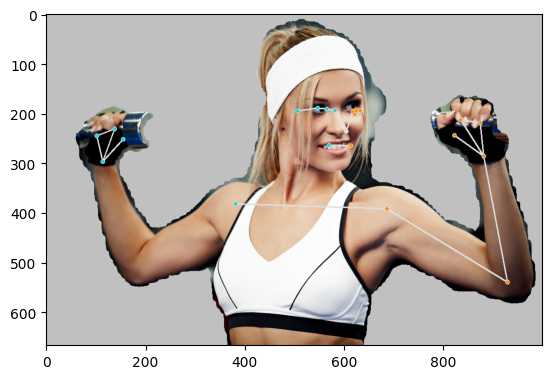

In [19]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

IMAGE_FILES = ['./pose_est/upper.jpg']
BG_COLOR = (192, 192, 192)  # gray

with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        image_height, image_width, _ = image.shape
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            continue
        print(
            f'Nose coordinates: ('
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
        )

        annotated_image = image.copy()

        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR
        annotated_image = np.where(condition, annotated_image, bg_image)
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
#         cv2.imwrite('./results/pose_body_annotated_image' + str(idx) + '.png', annotated_image)
#         mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS) 
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('./pose_est/pose_sample_video.mp4')
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("no camera")
            continue

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        cv2.imshow('MediaPipe Pose', image) # horizon flip for better view
#         cv2.imshow('MediaPipe Pose', cv2.flip(image, 1)) # horizon flip for better view
        
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

## ▶ Face Detection  

#### ■ MediaPipe's facial recognition is a blazing-fast facial recognition solution. 
- Support 6 face landmarks and multi-face recognition.   
- The module is based on BlazeFace, a lightweight and high-performance face detector.  
- The ultra-real-time capabilities of the recognizer can be used for tasks such as extracting 3D face keypoints, determining facial features or expressions, and segmenting facial features, such as geometric inference (e.g., face meshing). 
- You can work with just the CPU without the GPU.   

MediaPipe의 얼굴 인식은 엄청 빠른 얼굴 인식 솔루션입니다. 
- 6개의 얼굴 랜드마크와 다중 얼굴 인식 기능을 지원합니다. 
- 이 모듈은 가볍고 성능이 뛰어난 얼굴 검출기인 BlazeFace에 기반을 두었습니다. 
- 인식기의 초실시간 기능은 형상 추론(예: 얼굴 그물망)기능 같은 3D 얼굴 키포인트 추출, 얼굴의 특징 또는 표정 판별, 얼굴 부위 분할같은 작업에 사용할 수 있습니다. 
- GPU 없이 CPU만으로도 작업이 가능합니다.  

#### ■ MODEL_SELECTION 
>- The model index is either 0 or 1.
>- 0 is suitable for shooting partial models within 2 meters of the camera,
>- 1 is suitable for photographing full-body models within 5 meters.
>- If not specified, the default value is 0.
>- 모델 인덱스는 0 또는 1입니다.
>- 0을 사용하면 카메라 2m 이내의 부분적 모델 촬영에 적합하고,
>- 1은 5m 이내에서 전신 모델을 촬영하는데 적합합니다.
>- 지정하지 않을 경우의 기본값은 0입니다.  

#### ■ MIN_DETECTION_CONFIDENCE (Minimum Detection Confidence Value)  
>- The confidence value of the face detection model to be considered successful is ([0.0, 1.0]).
>- The default value is 0.5.
>- 검출에 성공한 것으로 간주할 얼굴의 검출 모델의 신뢰값은([0.0, 1.0])입니다.
>- 기본값은 0.5입니다.

In [10]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
 
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [11]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

Found 5 faces.


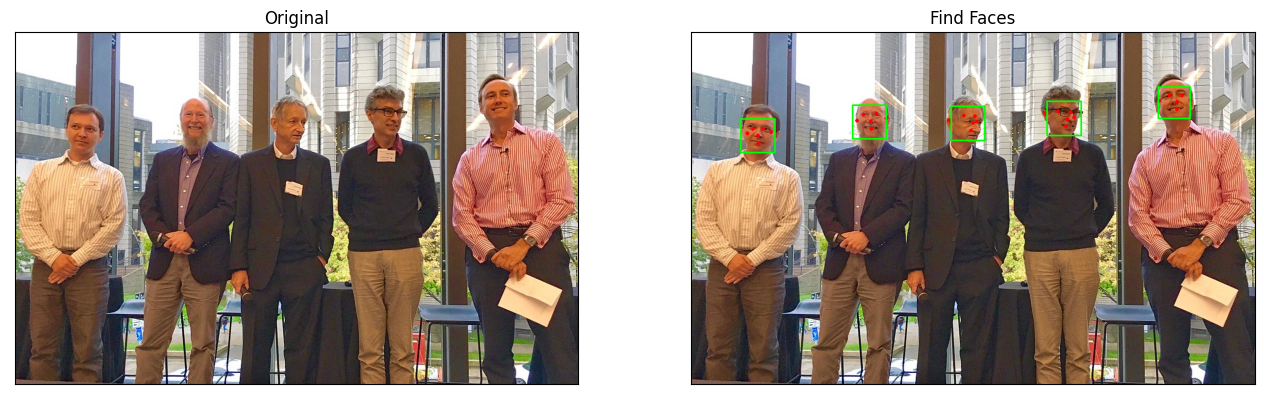

In [12]:
# image_path = './images/apink.jpg'
image = cv2.imread('./images/practice_img/men_tgt.jpg')
# image = cv2.imread('./images/practice_img/men5.png')

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Draw face detections of each face.
    if not results.detections:
        print("Face not found in image")
    else:
        print('Found {} faces.'.format(len(results.detections)))
        
        annotated_image = image.copy()
        
        for detection in results.detections:
            # print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
            mp_drawing.draw_detection(annotated_image, detection, bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2))
            
        plt_imshow(["Original", "Find Faces"], [image, annotated_image], figsize=(16,10))

## ▶ Face Mesh 

- MediaPipe's face mesh is a facial geometry solution that estimates __468 3D face landmarks in real time. (Also available on mobile!)__  
- It uses machine learning technology to infer 3D surface phenomena, so __it can be used with just a regular camera__ without a dedicated sensor.  
- The solution leverages pipelines (parallel processing of tasks), GPU acceleration, and lightweight model architecture (optimizations) to deliver __massive performance in real time__.  
- MediaPipe의 face mesh는 실시간으로 468개의 3D 얼굴 랜드마크를 추정하는 얼굴 형상 솔루션입니다.(모바일에서도 사용 가능!)
- 머신러닝 기술을 사용하여 3D표면 현상을 유추하므로 전용 센서 없이 일반 카메라만으로 사용이 가능합니다.
- 이 솔루션은 파이프라인(작업을 병렬 처리하는 기술), GPU 가속, 경량 모델 아키텍처(최적화)를 활용하여, 실시간으로 엄청난 성능을 낼 수 있습니다.  

<img src='./pose_est/pose_face_mesh.gif'  width=200 height=200>
<img src='./pose_est/attention_mesh_architecture.png'  width=600 height=400>


Found 1 faces.


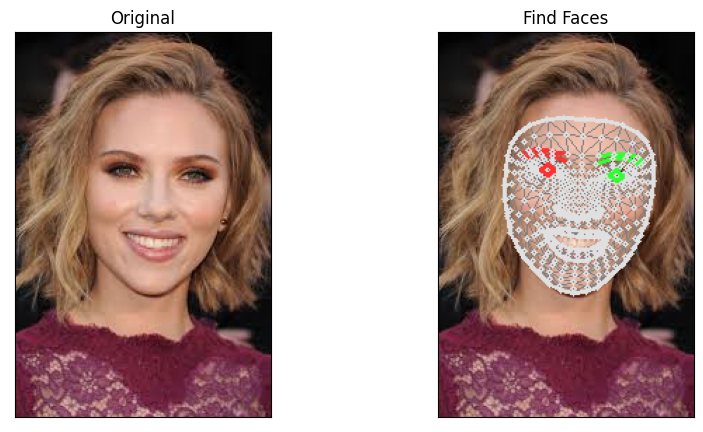

In [13]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
static_image_mode = True
max_num_faces = 10
refine_landmarks = True
min_detection_confidence = 0.5

image_path = './images/practice_img/Scarlett_Johansson.jpg'
image = cv2.imread(image_path)
with mp_face_mesh.FaceMesh(static_image_mode=static_image_mode, 
                           max_num_faces=max_num_faces, 
                           refine_landmarks=refine_landmarks, 
                           min_detection_confidence=min_detection_confidence) as face_mesh:
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    if not results.multi_face_landmarks:
        print("Face not found in image")
    else:
        print('Found {} faces.'.format(len(results.multi_face_landmarks)))
        
        annotated_image = image.copy()
        for face_landmarks in results.multi_face_landmarks:
            # print('face_landmarks:', face_landmarks)
            mp_drawing.draw_landmarks(image=annotated_image, 
                                      landmark_list=face_landmarks, 
                                      connections=mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=drawing_spec, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(image=annotated_image,
                                      landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=drawing_spec,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
            mp_drawing.draw_landmarks(image=annotated_image,
                                      landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_IRISES,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())
            
        plt_imshow(["Original", "Find Faces"], [image, annotated_image], figsize=(10,5))
 

## ▶ Real Time Pose Det

## ● Face

In [22]:
# for webcam or video file
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture(0, cv2.CAP_DSHOW) # faster capture
# cap = cv2.VideoCapture('./Videos/pose_dance.mp4')

with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Cannot find Web Cam")
            continue   # use 'continue' for video file, 'break' for webcam

        
        image.flags.writeable = False # img writeable false for better performance.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        # mesh on img face
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_tesselation_style())
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_contours_style())
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_IRISES,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_iris_connections_style())
        
        cv2.imshow('MediaPipe Face Mesh(Puleugo)', cv2.flip(image, 1)) # horizon flip for better view
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

### ● Hand 

MediaPipe Hands는 고성능 손, 손가락 추적 솔루션이다. 
- 머신 러닝(ML)을 사용하여 각 손마마다 21개의 3D 랜드마크를 프레임마다 추론한다. 
- 현재의 최첨단 접근 방식들은 추론을 위해 주로 강력한 하드웨어 성능에 의존하는 반면, 
- MediaPipe의 방법은 휴대폰에서도 실시간 성능을 달성하고 2개 이상의 손을 인식할 수 도 있다.

Hand Landmark  
<img src='./cv_data/pose_est/pose_hand1.png'  width=600 height=400>
<img src='./cv_data/pose_est/pose_hand2.png'  width=600 height=400>


In [23]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)

with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Cannot find Web Cam")
            continue

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())

        cv2.imshow('MediaPipe Hands', cv2.flip(image, 1)) # horizon flip for better view
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

## ● Objectron    
https://github.com/google-research-datasets/Objectron  

- MODEL_NAME   
>- The name of the model that will be used to predict the 3D bounding box landmark.
>- For now, {'Shoe', 'Chair', 'Cup', 'Camera'} are available. 
>- The default is 'Shoe'.    

<img src='./cv_data/pose_est/pose_obj1.png'  width=600 height=400>

<img src='./cv_data/pose_est/objectron_samples.gif'  width=600 height=400>


In [24]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_objectron = mp.solutions.objectron
cap = cv2.VideoCapture(0)

with mp_objectron.Objectron(static_image_mode=False,
                            max_num_objects=5,
                            min_detection_confidence=0.5,
                            min_tracking_confidence=0.99,
                            model_name='Shoe') as objectron:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Cannot find Web Cam")
            continue

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = objectron.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detected_objects:
            for detected_object in results.detected_objects:
                mp_drawing.draw_landmarks(
                    image,
                    detected_object.landmarks_2d,
                    mp_objectron.BOX_CONNECTIONS)
                mp_drawing.draw_axis(image, detected_object.rotation,
                                    detected_object.translation)
                
        cv2.imshow('MediaPipe Objectron', cv2.flip(image, 1)) # horizon flip for better view
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()